MONAI version: 1.2.0rc2+38.ge4b313d5
Numpy version: 1.23.0
Pytorch version: 1.13.0.dev20220728
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: e4b313d59b2702cd2a441d7a557650ced78dc6c8
MONAI __file__: /Users/pl771/miniforge3/envs/pytorch_m1/lib/python3.9/site-packages/monai/__init__.py

Optional dependencies:
Pytorch Ignite version: 0.4.8
ITK version: NOT INSTALLED or UNKNOWN VERSION.
Nibabel version: 5.2.0.dev2+ge221d77f
scikit-image version: 0.20.0
Pillow version: 9.2.0
Tensorboard version: NOT INSTALLED or UNKNOWN VERSION.
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.14.0.dev20220727
tqdm version: 4.64.0
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 5.9.1
pandas version: 1.4.3
einops version: NOT INSTALLED or UNKNOWN VERSION.
transformers version: NOT INSTALLED or UNKNOWN VERSION.
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: 1.0.0

For details about installing the optional depend

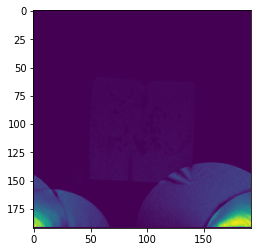

In [9]:
import glob
import os

import tempfile
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Any, Mapping, Hashable

import monai
from monai.config import print_config
from monai.utils import first
from monai.config import KeysCollection
from monai.data import Dataset, ArrayDataset, create_test_image_3d, DataLoader
from monai.transforms import (
    Transform,
    Compose,
    EnsureChannelFirst,
    LoadImage,
    Orientation,
)
print_config()

# Load images
srcdir = './sorted_phantom'
print('Reading labeled images from: ' + srcdir)
images = sorted(glob.glob(os.path.join(srcdir, 'train' + '_images', "*.nii.gz")))
labels = sorted(glob.glob(os.path.join(srcdir, 'train' + '_labels', "*.nii.gz")))

# Create dictionary
train_files = [
    {'image': image_name, 'label': label_name}
    for image_name, label_name in zip(images, labels)
]
img_file = train_files[0]['image']
label_file = train_files[0]['label']
fn_keys = ('image', 'label')  # filename keys for image and seg files

transfTest = Compose([LoadImage(image_only=True),
                EnsureChannelFirst(channel_dim='no_channel'), # This replaces deprecated AddChannel()
                # Orientation(axcodes='PLS'),
                Orientation(axcodes='ILP'),
                ])
img = transfTest(img_file)
img_arr = np.array(img)
print(np.shape(img_arr))

      
# print(img)
plt.imshow(img[0,:,:,0])

# trans = Compose([LoadImage(image_only=True), AddChannel(), Lambda(sum_width)])
# img = trans(filenames[0]["img"])